<a href="https://colab.research.google.com/github/teteumac/Analise-em-FAE/blob/main/MonteCarlo_Exercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercício 1**

Escreva um código que estime a área de um disco unitário usando o método Monte Carlo de acerto ou erro. Sabemos que o raio do disco unitário é 1, portanto, o círculo unitário está inscrito em um quadrado de comprimento 2. Dica: gere amostras dentro desse quadrado e conte o número de pontos que caem dentro do disco. Para testar se o ponto está dentro (hit) ou fora (miss) do disco, basta medir a distância da amostra da origem (o centro do disco unitário) e verificar se essa distância é menor (ou igual) do que o raio do disco (que é igual a 1 para um disco unitário).

Importando as bibliotecas necessárias

In [39]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
%matplotlib inline

Número de pontos usados

In [40]:
n=1000000

**x1** e **x2** são conjuntos de pontos que serão distribuidos entre os eixos bidimensionais nos intervalos +1 e -1 como mostra a figura abaixo.

In [41]:
x1=np.random.uniform(low=-1,high=1, size=n)
x2=np.random.uniform(low=-1,high=1, size=n)
 
z=np.sqrt((x1**2)+(x2**2))
 
print(4*sum(z<=1)/n)

3.141436


Fazemos ums discriminação dos valores que são menores ou iguais e maiores que z 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.6/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


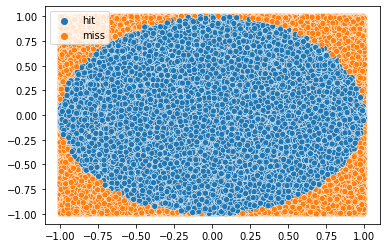

In [42]:
inout=np.where(z<=1,'hit','miss')
 
sns.scatterplot(x1,x2,hue=inout,legend=True)

In [43]:
print( 'number of elements inside of the circle --> ', inout[inout=='hit'].size, 'dots blues' )

number of elements inside of the circle -->  785359 dots blues
